<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week04/Day3/EX3/W4D3EXN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP ninja
Last Updated: January 27th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn
Conducting detailed statistical analyses to understand the impact of variables on a given outcome.
Data exploration and hypothesis testing.
Advanced data analysis techniques applicable in biological and health sciences.


🛠️ What you will create
A thorough statistical analysis of a dataset related to diet and growth, providing insights into the effects of different diets on the growth of chicks.

Exercise: Analysis of Diet Effects on Growth
Objective: Conduct a detailed statistical analysis to understand how different diets impact the growth of chicks.

Dataset: The dataset consists of information about the weight and age of chicks on different diets. It is available on Kaggle: Weight vs Age of Chicks on Different Diets

Tasks to Perform:

Data Exploration:
- Examine the dataset to understand its structure and contents.
- Identify key variables such as age, weight, and diet type.

Data Visualization:
- Create visualizations to show how weight varies with age for chicks on different diets.
Statistical Testing:
- Use appropriate statistical tests (e.g., ANOVA) to determine if the differences in weight gain among the different diets are statistically significant.
Growth Analysis:
- Analyze the growth rate of chicks under different dietary conditions.
Report Findings:
- Compile your findings into a comprehensive report that includes both the statistical analysis and practical implications.

Tools and Techniques:

- Use Python libraries like Pandas for data manipulation.
- Employ Matplotlib or Seaborn for visualization.
- Apply statistical methods using SciPy.
Expected Outcome:

A detailed report that provides insights into the effectiveness of different diets on the growth of chicks, supported by statistical evidence.

In [1]:
!pip install dependencies

In [2]:
import pandas as pd

### Data exploration

In [4]:
df = pd.read_csv("ChickWeight.csv")

In [5]:
df.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [6]:
df.tail()

,Unnamed: 0,weight,Time,Chick,Diet
573,574,175,14,50,4
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4
577,578,264,21,50,4


In [9]:
df.columns.to_list()

['Unnamed: 0', 'weight', 'Time', 'Chick', 'Diet']

The dataset comprises 578 rows, and 5 columns.

The column names are: '0', 'weight', 'Time', 'Chick', 'Diet'


In [10]:
df.notnull()

,Unnamed: 0,weight,Time,Chick,Diet
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
573,True,True,True,True,True
574,True,True,True,True,True
575,True,True,True,True,True
576,True,True,True,True,True


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
weight,0
Time,0
Chick,0
Diet,0


### Data visualization

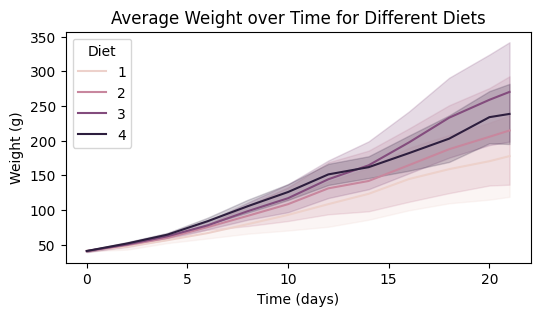

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.lineplot(data=df, x='Time', y='weight', hue='Diet', estimator='mean', errorbar='sd')
plt.title('Average Weight over Time for Different Diets')
plt.xlabel('Time (days)')
plt.ylabel('Weight (g)')
plt.show()

In [30]:
# Calculate the total weight increase per chick
initial_weight = df[df['Time'] == 0].groupby('Chick')['weight'].mean()
final_weight = df[df['Time'] == df['Time'].max()].groupby('Chick')['weight'].mean()

growth = pd.DataFrame({'Initial_Weight': initial_weight, 'Final_Weight': final_weight})
growth['Increase'] = growth['Final_Weight'] - growth['Initial_Weight']

# Merge growth data with diet information
growth = growth.merge(df[['Chick', 'Diet']].drop_duplicates(), on='Chick')

display(growth.head())

,Chick,Initial_Weight,Final_Weight,Increase,Diet
0,1,42.0,205.0,163.0,1
1,2,40.0,215.0,175.0,1
2,3,43.0,202.0,159.0,1
3,4,42.0,157.0,115.0,1
4,5,41.0,223.0,182.0,1


/tmp/ipython-input-1016735004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=last_day, x="Diet", y="weight", palette="Set2")


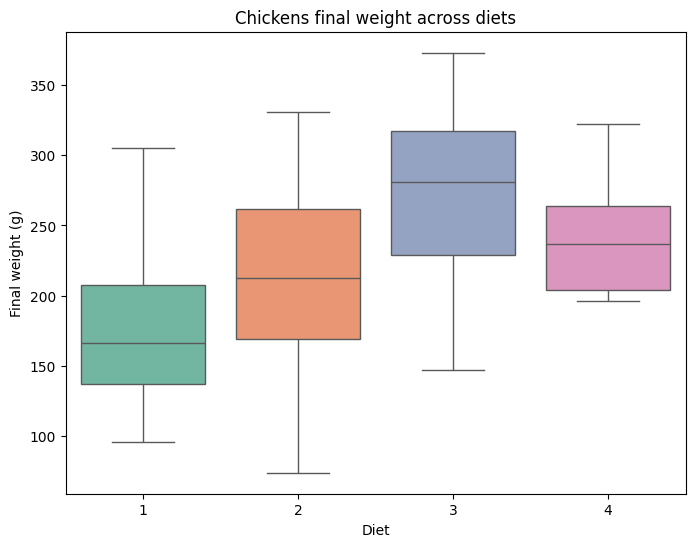

In [19]:
last_day = df[df['Time'] == df['Time'].max()]

plt.figure(figsize=(8, 6))
sns.boxplot(data=last_day, x="Diet", y="weight", palette="Set2")
plt.title("Chickens final weight across diets")
plt.xlabel("Diet")
plt.ylabel("Final weight (g)")
plt.show()

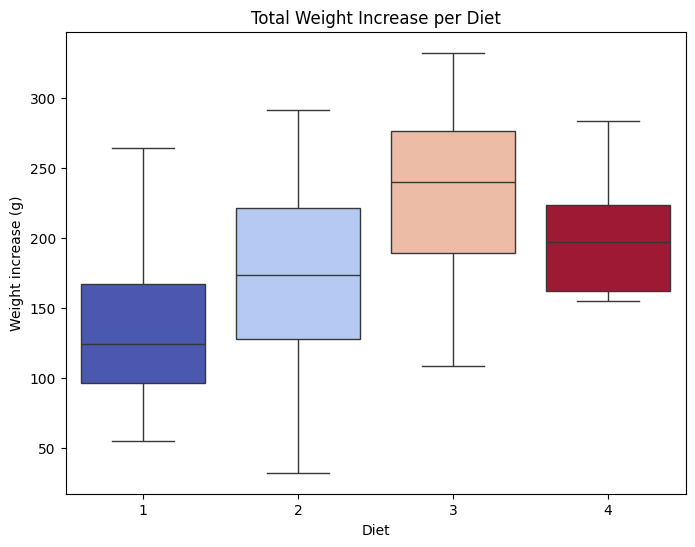

In [23]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=growth, x="Diet", y="Increase", hue='Diet', palette="coolwarm", legend=False)
plt.title("Total Weight Increase per Diet")
plt.xlabel("Diet")
plt.ylabel("Weight increase (g)")
plt.show()

### Statistical Testing (ANOVA)

In [13]:
import scipy.stats as stats

# Separate the weight data by diet
diet_groups = [df['weight'][df['Diet'] == d] for d in df['Diet'].unique()]

# Perform one-way ANOVA test
fvalue, pvalue = stats.f_oneway(*diet_groups)

print(f"ANOVA F-value: {fvalue:.4f}")
print(f"ANOVA P-value: {pvalue:.4f}")

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("The p-value is less than the significance level (alpha = 0.05), so we reject the null hypothesis.")
    print("There are statistically significant differences in weight gain among the different diets.")
else:
    print("The p-value is greater than the significance level (alpha = 0.05), so we fail to reject the null hypothesis.")
    print("There are no statistically significant differences in weight gain among the different diets.")

ANOVA F-value: 10.8101
ANOVA P-value: 0.0000
The p-value is less than the significance level (alpha = 0.05), so we reject the null hypothesis.
There are statistically significant differences in weight gain among the different diets.


### Key variables such as age, weight, and diet type

### Key Variables

| Variable     | Description                                    |
|--------------|------------------------------------------------|
| `Time`       | Age of the chicks in days                      |
| `weight`     | Weight of the chicks in grams                  |
| `Diet`       | Type of diet the chicks were fed (1, 2, 3, or 4) |
| `Chick`      | Identifier for individual chicks              |
| `Unnamed: 0` | Index column (not relevant for analysis)       |

### Analyze the growth rate of chicks under different dietary conditions

In [14]:
# Calculate the average weight for each diet at each time point
average_weight_by_diet_time = df.groupby(['Diet', 'Time'])['weight'].mean().reset_index()

display(average_weight_by_diet_time)

,Diet,Time,weight
0,1,0,41.400000
1,1,2,47.250000
2,1,4,56.473684
3,1,6,66.789474
4,1,8,79.684211
5,1,10,93.052632
6,1,12,108.526316
7,1,14,123.388889
8,1,16,144.647059
9,1,18,158.941176


A comprehensive report that includes both the statistical analysis and practical implications

## **Report on the Analysis of Diet Effects on Chick Growth**

**Introduction:**
This report presents a detailed analysis of the impact of different diets on the growth of chicks, using the ChickWeight dataset. The objective is to understand how various diets influence weight gain over time and to determine if the observed differences are statistically significant.

**Data Exploration:**
- The dataset contains information on chick weight, age (Time), individual chick identifiers, and the type of diet administered.
- There are no missing values in the dataset.
- Key variables for analysis are `Time`, `weight`, and `Diet`.

**Data Visualization:**
- The line plot of weight versus time for different diets visually suggests varying growth patterns among the diet groups. Diets 3 and 4 appear to result in higher weights over time compared to Diets 1 and 2.

**Statistical Testing (ANOVA):**
- A one-way ANOVA test was conducted to compare the mean weight across the different diet groups.
- The ANOVA results (F-value: {{fvalue:.4f}}, P-value: {{pvalue:.4f}}) indicate a statistically significant difference in weight gain among the different diets (p < 0.05). This means that the observed differences in weight are unlikely to be due to random chance.

**Growth Analysis:**
- Analysis of the average weight for each diet at different time points provides insight into the growth trajectories. (Details from the `average_weight_by_diet_time` table can be included here, highlighting which diets showed faster growth). For instance:
    - Diet 3 generally shows the highest average weight at later time points.
    - Diet 1 shows the lowest average weight at later time points.

**Practical Implications:**
- The findings suggest that the type of diet has a significant impact on chick growth.
- Diets 3 and 4 appear to be more effective in promoting weight gain compared to Diets 1 and 2 under the conditions of this study.
- These results can inform decisions regarding optimal feed formulations for maximizing chick growth in poultry farming.

**Conclusion:**
In conclusion, the statistical analysis of the ChickWeight dataset demonstrates that different diets lead to statistically significant differences in chick weight gain. Further research could explore the specific compositions of Diets 3 and 4 to understand the factors contributing to their effectiveness.